In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
img_rows, img_cols = 64, 64
x = []
y = []

data_path = '/content/drive/MyDrive/Vehicle'

classes = os.listdir(data_path)

for(index, class_path) in enumerate(classes):
  class_path = os.path.join(data_path, class_path)
  for img_path in os.listdir(class_path):
    img_path = os.path.join(class_path, img_path)
    img = keras.utils.load_img(img_path, color_mode='grayscale', target_size=(img_rows, img_cols))
    img = keras.utils.img_to_array(img)
    x.append(img)
    y.append(index)

x = np.array(x)
y = np.array(y)

x = x.astype('float32') / 255.0

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=len(classes))
y_val = keras.utils.to_categorical(y_val, num_classes=len(classes))
y_test = keras.utils.to_categorical(y_test, num_classes=len(classes))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (img_rows, img_cols, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (2,2), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (2,2), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 426,947 (1.63 MB)

 Trainable params: 426,947 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data = (x_val, y_val), batch_size=32)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step - accuracy: 0.3466 - loss: 1.1294 - val_accuracy: 0.5254 - val_loss: 1.0306
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5010 - loss: 0.9628 - val_accuracy: 0.5763 - val_loss: 0.8115
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6482 - loss: 0.7485 - val_accuracy: 0.5763 - val_loss: 0.8261
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7587 - loss: 0.6323 - val_accuracy: 0.6610 - val_loss: 0.7218
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8058 - loss: 0.5345 - val_accuracy: 0.7797 - val_loss: 0.6512
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7328 - loss: 0.5560 - val_accuracy: 0.7119 - val_loss: 0.7028
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7754 - loss: 0.5628 - val_accuracy: 0.7119 - val_loss: 0.6149
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8324 - loss: 0.4276 - val_accuracy: 0.7458 - val_lo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Test Loss: 0.6221871972084045
Test Accuracy: 0.7288135886192322


In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis = 1)

for i in range(15):
  print(f"Sample {i+1} - Predicted Class: {classes[predicted_classes[i]]} - Actual Class: {classes[actual_classes[i]]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step
Sample 1 - Predicted Class: ship - Actual Class: ship
Sample 2 - Predicted Class: cars - Actual Class: cars
Sample 3 - Predicted Class: cars - Actual Class: cars
Sample 4 - Predicted Class: airplanes - Actual Class: airplanes
Sample 5 - Predicted Class: airplanes - Actual Class: ship
Sample 6 - Predicted Class: ship - Actual Class: airplanes
Sample 7 - Predicted Class: ship - Actual Class: ship
Sample 8 - Predicted Class: cars - Actual Class: airplanes
Sample 9 - Predicted Class: cars - Actual Class: ship
Sample 10 - Predicted Class: ship - Actual Class: ship
Sample 11 - Predicted Class: airplanes - Actual Class: airplanes
Sample 12 - Predicted Class: airplanes - Actual Class: airplanes
Sample 13 - Predicted Class: ship - Actual Class: ship
Sample 14 - Predicted Class: ship - Actual Class: ship
Sample 15 - Predicted Class: airplanes - Actual Class: ship


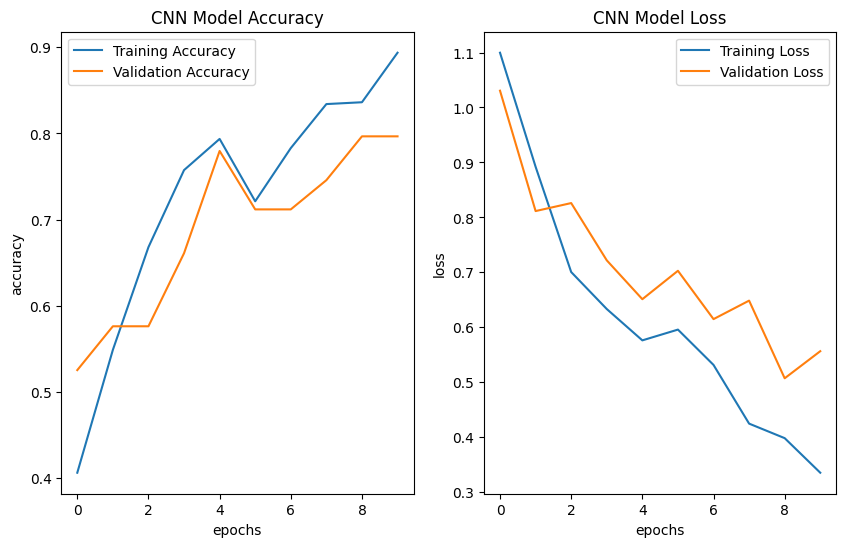

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('CNN Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('CNN Model Loss')
plt.legend()

plt.show()

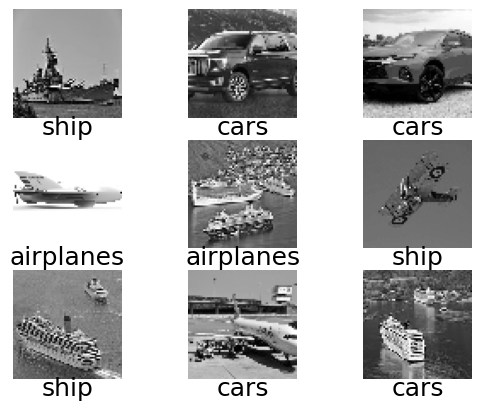

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.axis('off')
  plt.text(0.5, -0.15, classes[predicted_classes[i]], fontsize=18, ha='center', transform=plt.gca().transAxes)